In [178]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import f, t
import pandas as pd
import statsmodels.api as sm

In [179]:
n = 450
g = 0.97
alpha = 0.03
gender = 0 
a = 2 
b = 10 

In [180]:
data = pd.read_excel("LAB_4_DATA_2024.xlsx",sheet_name='ДАННЫЕ',nrows=n,header=0)
data

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
0,22.384615,12,0,53.410000
1,8.903846,12,0,8.000000
2,13.250000,15,0,24.000000
3,18.250000,13,0,29.500000
4,13.769231,18,0,32.049999
...,...,...,...,...
445,13.115385,12,1,53.250000
446,15.711538,12,1,6.750000
447,20.038462,12,1,18.160000
448,11.403846,12,1,8.420000


In [181]:
data = data.sample(frac=1, axis=0)
data

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
307,21.173077,12,1,15.11
283,9.192307,12,1,25.91
344,8.153846,18,1,23.07
125,19.538462,16,0,15.66
346,16.711538,15,1,16.02
...,...,...,...,...
179,19.307692,12,0,21.23
437,15.711538,18,1,22.52
441,14.038462,17,1,18.08
364,16.634615,15,1,16.00


# 1 Задание

In [182]:
zarp = data['Зарплата (долл. в час)'].values
zarp

array([ 15.10999966,  25.90999985,  23.06999969,  15.65999985,
        16.02000046,  29.5       ,  14.5       ,  50.15999985,
         9.40999985,   5.1500001 ,   8.35000038,  25.95999908,
        10.89000034,  22.38999939,  13.67000008,  53.25      ,
       109.61000061,   8.5       ,  16.14999962,  10.        ,
        20.82999992,  14.89999962,  10.67000008,  12.17000008,
        48.06999969,  18.01000023,  38.45999908,  24.03000069,
        65.11000061,  15.75      ,   7.5       ,  21.36000061,
        19.22999954,   6.75      ,  10.        , 105.69999695,
        25.        ,  10.75      ,  25.89999962,  13.        ,
        11.82999992,  10.        ,  17.72999954,  24.        ,
        19.79999924,  30.54999924,  13.32999992,  17.79999924,
        10.01000023,  25.        ,   9.09000015,  33.65000153,
         8.35000038,  24.67000008,   8.        ,  16.        ,
        57.25999832,  21.92000008,   8.        ,  23.06999969,
        23.17000008,   9.        ,  10.76000023,   7.84

In [183]:
gen = data['ПОЛ (1-жен, 0- муж)'].values
gen = gen.reshape((-1, 1))
gen

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [184]:
gens = sm.add_constant(gen)
model = sm.OLS(zarp, gens)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     24.06
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.31e-06
Time:                        21:04:32   Log-Likelihood:                -1848.9
No. Observations:                 450   AIC:                             3702.
Df Residuals:                     448   BIC:                             3710.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1145      0.898     25.731      0.0

In [185]:
model = LinearRegression()
model.fit(gen, zarp)

LinearRegression()

c:\Users\DarVeter\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


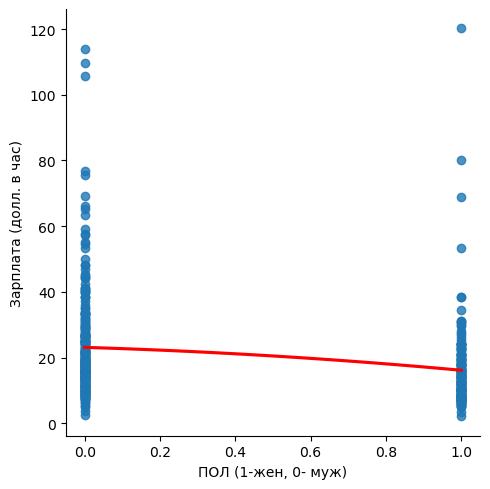

In [186]:
sns.lmplot( x='ПОЛ (1-жен, 0- муж)', 
            y='Зарплата (долл. в час)',
            data=data, 
            order=2, 
            ci=None,
            line_kws={'color' : 'red'}
            )

# 2 Задание

In [187]:
y_predict = model.predict(gen)
errors=zarp-y_predict 
print(sp.stats.shapiro(errors))

ShapiroResult(statistic=0.738915205001831, pvalue=5.33479143328804e-26)


In [188]:
ESS = sum(errors**2) #Сумма квадратов ошибок  
print('СКО =' , ESS)

RSS=sum((y_predict-np.mean(y_predict)) ** 2) # Сумма квадратов регрессии
print('СКР =' , RSS)

TSS=sum((zarp-np.mean(zarp)) ** 2) # Общая сумма квадратов
print('ОСК =' , TSS)

print('СКО + СКР =' , ESS + RSS)

R2 = 1-ESS/TSS # Кэифициент детерминации
print('R2 =', R2)

СКО = 97607.5596478432
СКР = 5241.190376470379
ОСК = 102848.75002431353
СКО + СКР = 102848.75002431357
R2 = 0.05096017574575584


In [189]:
# H0 -  R-квадрат незначительно
# H1 -  R-квадрат значительно
m = 1
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_crit = f.ppf(1-alpha, m, n-m-1)
print(f"F_crit - критическое значение: {F_crit}")

if F > F_crit:
    print(f"Коээфициент R2 значим на уровне alpha = ", alpha)
else:
    print(f"Коээфициент R2 не значим на уровне alpha = ", alpha)

F - наблюдаемое значение: 24.056059767606477
F_crit - критическое значение: 4.739440573716373
Коээфициент R2 значим на уровне alpha =  0.03


# 3 Задание

In [190]:
X=sm.add_constant(data[["ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","СТАЖ РАБОТЫ (лет)"]])
model_2 = sm.OLS(data['Зарплата (долл. в час)'], X).fit()
summary_2=model_2.summary()
summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.200
Model:                                OLS   Adj. R-squared:                  0.196
Method:                     Least Squares   F-statistic:                     55.77
Date:                    Sat, 21 Dec 2024   Prob (F-statistic):           2.39e-22
Time:                            21:04:34   Log-Likelihood:                -1810.5
No. Observations:                     450   AIC:                             3627.
Df Residuals:                         447   BIC:                             3639.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     -27.2544      4.860     -5.608      0.000     -36.805     -17.704
ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)     2.7301      0.262     10.412      0.000       2.215       3.245
СТАЖ РАБОТЫ (лет)                           0.5990      0.147      4.078      0.000       0.310       0.888
==============================================================================
Omnibus:                      323.398   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4556.130
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      17.400   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 Задание

Из предыдущего пункта видно что на 0.5990	

# 5 Задание

In [191]:
X=sm.add_constant(data["ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)"])
model_3 = sm.OLS(data['Зарплата (долл. в час)'], X).fit()
summary_3=model_3.summary()
summary_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.170
Model:                                OLS   Adj. R-squared:                  0.168
Method:                     Least Squares   F-statistic:                     91.71
Date:                    Sat, 21 Dec 2024   Prob (F-statistic):           6.91e-20
Time:                            21:04:34   Log-Likelihood:                -1818.8
No. Observations:                     450   AIC:                             3642.
Df Residuals:                         448   BIC:                             3650.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     -13.7458      3.617     -3.800      0.000     -20.854      -6.637
ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)     2.4879      0.260      9.576      0.000       1.977       2.999
==============================================================================
Omnibus:                      325.191   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4629.994
Skew:                           3.005   Prob(JB):                         0.00
Kurtosis:                      17.520   Cond. No.                         77.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 6 Задание

In [192]:
X=sm.add_constant(data[["ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","СТАЖ РАБОТЫ (лет)"]])
model_2 = sm.OLS(data['Зарплата (долл. в час)'], X).fit()
summary_2=model_2.summary()
summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.200
Model:                                OLS   Adj. R-squared:                  0.196
Method:                     Least Squares   F-statistic:                     55.77
Date:                    Sat, 21 Dec 2024   Prob (F-statistic):           2.39e-22
Time:                            21:04:34   Log-Likelihood:                -1810.5
No. Observations:                     450   AIC:                             3627.
Df Residuals:                         447   BIC:                             3639.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     -27.2544      4.860     -5.608      0.000     -36.805     -17.704
ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)     2.7301      0.262     10.412      0.000       2.215       3.245
СТАЖ РАБОТЫ (лет)                           0.5990      0.147      4.078      0.000       0.310       0.888
==============================================================================
Omnibus:                      323.398   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4556.130
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      17.400   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
y_predict = model_2.predict(X)
errors=zarp-y_predict 
print(sp.stats.shapiro(errors))

ShapiroResult(statistic=0.7609642744064331, pvalue=4.862510516612568e-25)


In [194]:
ESS = sum(errors**2) #Сумма квадратов ошибок  
print('СКО =' , ESS)

RSS=sum((y_predict-np.mean(y_predict)) ** 2) # Сумма квадратов регрессии
print('СКР =' , RSS)

TSS=sum((zarp-np.mean(zarp)) ** 2) # Общая сумма квадратов
print('ОСК =' , TSS)

print('СКО + СКР =' , ESS + RSS)

R2 = 1-ESS/TSS # Кэифициент детерминации
print('R2 =', R2)

СКО = 82310.75687019908
СКР = 20537.99315411452
ОСК = 102848.75002431353
СКО + СКР = 102848.7500243136
R2 = 0.19969122764505398


In [195]:
# H0 -  R-квадрат незначительно
# H1 -  R-квадрат значительно
m = 1
F = (RSS/m)/(ESS/(n-m-1))
print(f"F - наблюдаемое значение: {F}")
F_crit = f.ppf(1-alpha, m, n-m-1)
print(f"F_crit - критическое значение: {F_crit}")

if F > F_crit:
    print(f"Коээфициент R2 значим на уровне alpha = ", alpha)
else:
    print(f"Коээфициент R2 не значим на уровне alpha = ", alpha)

F - наблюдаемое значение: 111.78394274217358
F_crit - критическое значение: 4.739440573716373
Коээфициент R2 значим на уровне alpha =  0.03


# 7 Задание

In [196]:
model_2 = LinearRegression()
model_2.fit(X, zarp)

LinearRegression()

In [197]:
n = len(zarp)
sigma2 = np.sum(errors**2)/(n-2-1)
sigma = np.sqrt(sigma2)
print(sigma)

13.569834032985524


In [198]:
X_matr = np.column_stack((np.ones((n, 1)), data["ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)"], data["СТАЖ РАБОТЫ (лет)"]))
X_matr

array([[ 1.        , 12.        , 21.17307663],
       [ 1.        , 12.        ,  9.19230747],
       [ 1.        , 18.        ,  8.15384579],
       ...,
       [ 1.        , 17.        , 14.03846169],
       [ 1.        , 15.        , 16.63461494],
       [ 1.        , 12.        , 14.98076916]])

In [199]:
from scipy import linalg

X_matr_T=X_matr.transpose()
Z=X_matr_T.dot(X_matr)
Z_inv =linalg.inv(Z)

In [200]:
import math
se_b_0_hat=sigma*math.sqrt(Z_inv[0][0])
print(f"Стандартная ошибка коэффициента b_0_hat: {se_b_0_hat}")   
se_b_1_hat=sigma*math.sqrt(Z_inv[1][1])
print(f"Стандартная ошибка коэффициента b_1_hat: {se_b_1_hat}")   
se_b_2_hat=sigma*math.sqrt(Z_inv[2][2])
print(f"Стандартная ошибка коэффициента b_2_hat: {se_b_2_hat}")  

Стандартная ошибка коэффициента b_0_hat: 4.859612074564015
Стандартная ошибка коэффициента b_1_hat: 0.2621974081783459
Стандартная ошибка коэффициента b_2_hat: 0.1468853178732929


In [201]:
from scipy import stats

gamma = 0.925
n = len(zarp)
m = 2
b_0_hat=model_2.intercept_
b_1_hat=model_2.coef_[0]
b_2_hat=model_2.coef_[1]

t_cr = stats.t.ppf((1+gamma)/2, n-m-1)
print(f"Доверительный интервал для b_0_hat на уровне надежности: {gamma}: {b_0_hat - (t_cr*se_b_0_hat), b_0_hat + (t_cr*se_b_0_hat)}")
print(f"Доверительный интервал для b_1_hat на уровне надежности: {gamma}: {b_1_hat - (t_cr*se_b_1_hat), b_1_hat + (t_cr*se_b_1_hat)}")
print(f"Доверительный интервал для b_2_hat на уровне надежности: {gamma}: {b_2_hat - (t_cr*se_b_2_hat), b_2_hat + (t_cr*se_b_2_hat)}")

Доверительный интервал для b_0_hat на уровне надежности: 0.925: (-35.926954198008104, -18.581769346249914)
Доверительный интервал для b_1_hat на уровне надежности: 0.925: (-0.46792443951540313, 0.46792443951540313)
Доверительный интервал для b_2_hat на уровне надежности: 0.925: (2.467942194435643, 2.992213052156339)


In [204]:
from scipy import stats
b_1_hat=model_2.coef_[0]
b_2_hat=model_2.coef_[1]

alpha = 0.075
m = 2

t_1 = b_1_hat/ se_b_1_hat
print(f'СВ t_1:  {t_1}')
t_2 = b_2_hat/ se_b_2_hat
print(f'СВ t_2:  {t_2}')

t_cr = stats.t.ppf(1-alpha/2, n - m - 1)
print(t_cr)

if -t_cr < t_1 < t_cr:
    print(f"Коэффициент b1_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b1_hat значим на уровне значимости alpha: {alpha}")

if -t_cr < t_2 < t_cr:
    print(f"Коэффициент b2_hat не значим на уровне значимости alpha: {alpha}")
else:
    print(f"Коэффициент b2_hat значим на уровне значимости alpha: {alpha}")

СВ t_1:  0.0
СВ t_2:  18.58645685507538
1.7846264872195925
Коэффициент b1_hat не значим на уровне значимости alpha: 0.075
Коэффициент b2_hat значим на уровне значимости alpha: 0.075
